<a href="https://colab.research.google.com/github/RafsanJany-44/practice_cell/blob/master/MEGA_KNN_20f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:

dataset = pd.read_csv("/content/drive/MyDrive/Thesis_Data/MEGA_20f.csv")

In [30]:
dataset.head()

,Sleep_Stage,MedianF_Beta_F4,Spectral Edge_Beta_F4,Spectral Edge_Beta_C4,PeakF_Beta_F4,Spectral Edge_Alpha_F4,MedianF_Beta_C4,PeakF_Beta_C4,MeanF_Alpha_F4,MeanF_Beta_F4,...,PeakF_Beta_O2,Spectral Edge_Alpha_C4,MeanF_Alpha_C4,PeakF_Theta_C4,MedianF_Theta_C4,PeakF_Theta_F4,PeakF_Theta_O2,MeanF_Delta_C4,MedianF_Theta_O2,Spectral Edge_Theta_O2
0,W,19.73073,33.84195,33.21756,15.98439,17.48293,19.98049,16.85854,18.48195,29.84585,...,21.22927,18.48195,19.35610,3.87122,5.24488,2.62244,2.24780,5.49463,4.49561,10.73951
1,W,17.23317,29.34634,28.47220,19.60585,16.85854,17.35805,17.35805,17.48293,26.34927,...,19.48098,17.35805,17.73268,3.62146,5.74439,2.87220,2.99707,5.86927,5.86927,11.23902
2,W,17.60780,28.22244,26.84878,18.73171,17.48293,17.60780,14.23610,17.98244,25.47512,...,20.72976,17.73268,18.10732,2.99707,5.61951,2.99707,5.12000,5.74439,5.74439,11.11415
3,W,17.35805,28.72195,28.09756,16.35902,17.10829,18.85659,16.35902,17.60780,26.47415,...,16.35902,17.85756,18.35707,5.86927,5.99415,2.12293,3.62146,6.49366,6.11902,10.98927
4,W,17.23317,28.09756,28.09756,17.60780,17.23317,17.35805,17.60780,17.60780,25.84976,...,20.48000,17.48293,17.73268,5.74439,5.74439,2.99707,2.99707,6.11902,5.86927,10.98927


In [31]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 795  633   40  411  510]
 [ 537 5916  907  501  169]
 [  86  983 3132   21   18]
 [ 368  832   73 1869   90]
 [ 477  239   48  117 2919]]
              precision    recall  f1-score   support

          N1       0.35      0.33      0.34      2389
          N2       0.69      0.74      0.71      8030
          N3       0.75      0.74      0.74      4240
           R       0.64      0.58      0.61      3232
           W       0.79      0.77      0.78      3800

    accuracy                           0.67     21691
   macro avg       0.64      0.63      0.64     21691
weighted avg       0.67      0.67      0.67     21691



In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

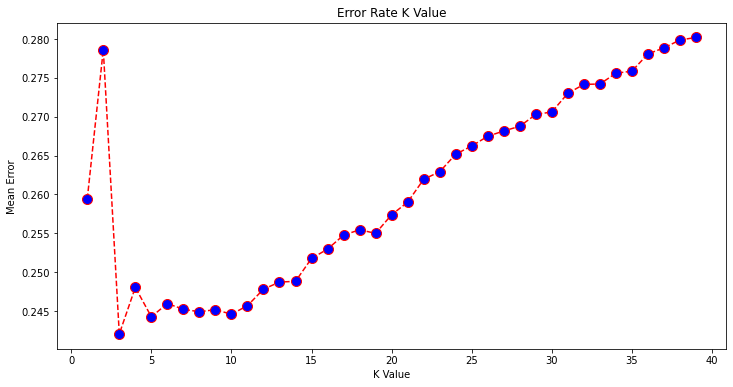

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')